In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r1/title_r1_2.5k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 2500 drug-target pairs
encoding drug...
unique drugs: 2459
encoding protein...
unique target sequence: 761
splitting dataset...
Done.


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 50.0102. Total time 0.00444 hours
Validation at Epoch 1 with loss:4.83192, MSE: 4.83192 , Pearson Correlation: 0.05599 with p-value: 3.78E-01 , Concordance Index: 0.50818
Training at Epoch 2 iteration 0 with loss 4.64512. Total time 0.33083 hours
Validation at Epoch 2 with loss:3.97587, MSE: 3.97587 , Pearson Correlation: 0.06708 with p-value: 2.91E-01 , Concordance Index: 0.51243
Training at Epoch 3 iteration 0 with loss 3.71406. Total time 0.67527 hours
Validation at Epoch 3 with loss:2.58542, MSE: 2.58542 , Pearson Correlation: 0.10020 with p-value: 1.14E-01 , Concordance Index: 0.52137
Training at Epoch 4 iteration 0 with loss 2.33936. Total time 1.01138 hours
Validation at Epoch 4 with loss:2.31091, MSE: 2.31091 , Pearson Correlation: 0.13040 with p-value: 3.94E-02 , Concordance Index: 0.52790
Training at Epoch 5 iteration 0 with loss 2.37272. Total time 1.3475 hours
Validat

Training at Epoch 39 iteration 0 with loss 1.14197. Total time 13.13 hours
Validation at Epoch 39 with loss:2.18512, MSE: 2.18512 , Pearson Correlation: 0.33665 with p-value: 4.86E-08 , Concordance Index: 0.59906
Training at Epoch 40 iteration 0 with loss 1.19279. Total time 13.4652 hours
Validation at Epoch 40 with loss:2.26077, MSE: 2.26077 , Pearson Correlation: 0.34525 with p-value: 2.08E-08 , Concordance Index: 0.60195
Training at Epoch 41 iteration 0 with loss 1.15977. Total time 13.8180 hours
Validation at Epoch 41 with loss:2.21868, MSE: 2.21868 , Pearson Correlation: 0.35046 with p-value: 1.23E-08 , Concordance Index: 0.60459
Training at Epoch 42 iteration 0 with loss 1.02498. Total time 14.1633 hours
Validation at Epoch 42 with loss:2.28040, MSE: 2.28040 , Pearson Correlation: 0.34803 with p-value: 1.58E-08 , Concordance Index: 0.60243
Training at Epoch 43 iteration 0 with loss 1.16057. Total time 14.4911 hours
Validation at Epoch 43 with loss:2.14349, MSE: 2.14349 , Pearson 

Validation at Epoch 77 with loss:2.60086, MSE: 2.60086 , Pearson Correlation: 0.35551 with p-value: 7.34E-09 , Concordance Index: 0.61961
Training at Epoch 78 iteration 0 with loss 0.32733. Total time 25.3658 hours
Validation at Epoch 78 with loss:2.39285, MSE: 2.39285 , Pearson Correlation: 0.36467 with p-value: 2.80E-09 , Concordance Index: 0.62302
Training at Epoch 79 iteration 0 with loss 0.13498. Total time 25.6672 hours
Validation at Epoch 79 with loss:2.48618, MSE: 2.48618 , Pearson Correlation: 0.35800 with p-value: 5.66E-09 , Concordance Index: 0.62003
Training at Epoch 80 iteration 0 with loss 0.12775. Total time 25.9727 hours
Validation at Epoch 80 with loss:2.54709, MSE: 2.54709 , Pearson Correlation: 0.35060 with p-value: 1.21E-08 , Concordance Index: 0.61546
Training at Epoch 81 iteration 0 with loss 0.12414. Total time 26.2702 hours
Validation at Epoch 81 with loss:2.57460, MSE: 2.57460 , Pearson Correlation: 0.34701 with p-value: 1.75E-08 , Concordance Index: 0.61189
Tr

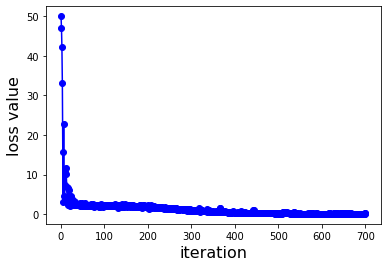

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r1/model_r1_2.5k_100epochs')